# Exploring Bias-variance Tradeoffs using a Gaussian kernel SVM

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from numpy import linalg as lin
from cs771 import plotData as pd, utils, genSyntheticData as gsd
from sklearn.svm import SVC as csvm
import random
from matplotlib import pyplot as plt

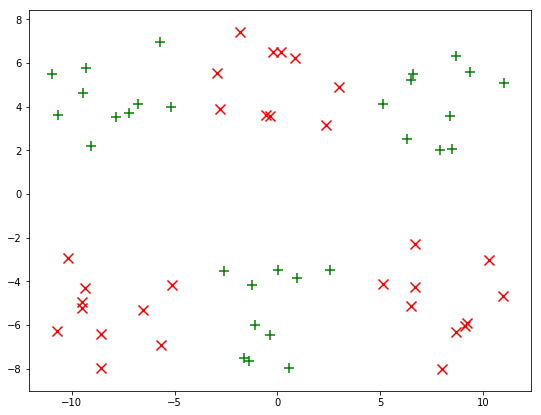

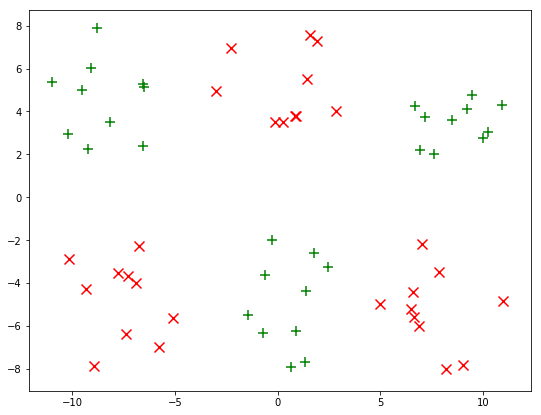

In [3]:
def genStackedCirclesData( d, n, r ):
    tmp1 = gsd.genSphericalData( d, n, [-8, 5], r )
    tmp2 = gsd.genSphericalData( d, n, [0, -5], r )
    tmp3 = gsd.genSphericalData( d, n, [8, 5], r )
    tmp4 = gsd.genSphericalData( d, n, [-8, 5], r/2 )
    tmp5 = gsd.genSphericalData( d, n, [0, -5], r/2 )
    tmp6 = gsd.genSphericalData( d, n, [8, 5], r/2 )
    XPos = np.vstack( (tmp1, tmp2, tmp3, tmp4, tmp5, tmp6) )
    yPos = np.ones( (XPos.shape[0],) )
    
    tmp1 = gsd.genSphericalData( d, n, [-8, -5], r )
    tmp2 = gsd.genSphericalData( d, n, [0, 5], r )
    tmp3 = gsd.genSphericalData( d, n, [8, -5], r )
    tmp4 = gsd.genSphericalData( d, n, [-8, -5], r/2 )
    tmp5 = gsd.genSphericalData( d, n, [0, 5], r/2 )
    tmp6 = gsd.genSphericalData( d, n, [8, -5], r/2 )
    XNeg = np.vstack( (tmp1, tmp2, tmp3, tmp4, tmp5, tmp6) )
    yNeg = -np.ones( (XNeg.shape[0],) )
    
    return (XPos, yPos, XNeg, yNeg)

d = 2 
n = 5
r = 3

(XPos, yPos, XNeg, yNeg) = genStackedCirclesData( d, n, r )
Xtrn = np.vstack( (XPos, XNeg) )
ytrn = np.concatenate( (yPos, yNeg) )

fig = pd.getFigure( 9, 7 )
pd.plot2D( XPos, fig, color = 'g', marker = '+' )
pd.plot2D( XNeg, fig, color = 'r', marker = 'x' )

(XPos, yPos, XNeg, yNeg) = genStackedCirclesData( d, n, r )
Xval = np.vstack( (XPos, XNeg) )
yval = np.concatenate( (yPos, yNeg) )

fig2 = pd.getFigure( 9, 7 )
pd.plot2D( XPos, fig2, color = 'g', marker = '+' )
pd.plot2D( XNeg, fig2, color = 'r', marker = 'x' )

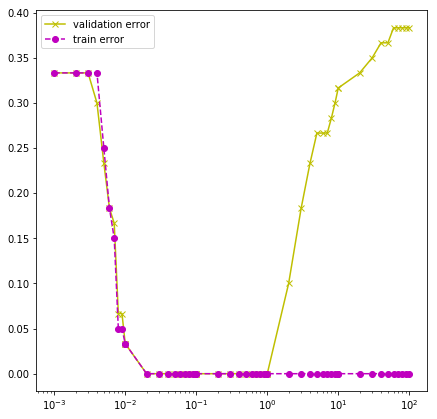

In [4]:
a = np.array( np.arange( 1, 11 ) )
b = np.array( [0.001, 0.01, 0.1, 1, 10] )
gVals = np.kron( b, a )
trainAcc = np.zeros_like( gVals )
valAcc = np.zeros_like( gVals )

# For small values of bandwidth parameter, the Gaussian kernel
# almost behaves like a linear kernel - high bias, low variance
# For large values of bandwidth parameter, the Gaussian kernel
# is a universal approximator - very low bias, high variance
# Need a lot of data to learn properly with high gamma values

for i in range( len(gVals) ):
    g = gVals[i]
    clf = csvm( C = 1.0, kernel = "rbf", gamma = g )
    clf.fit( Xtrn, ytrn )
    trainAcc[i] = clf.score( Xtrn, ytrn )
    valAcc[i] = clf.score( Xval, yval )

fig3 = pd.getFigure( 7, 7 )
plt.semilogx( gVals, 1 - valAcc, marker = 'x', label = "validation error", color = 'y' )
plt.semilogx( gVals, 1 - trainAcc, marker = 'o', linestyle = '--', label = "train error", color = 'm' )
plt.legend()

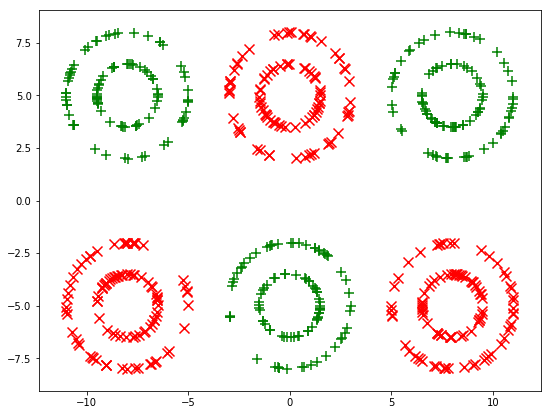

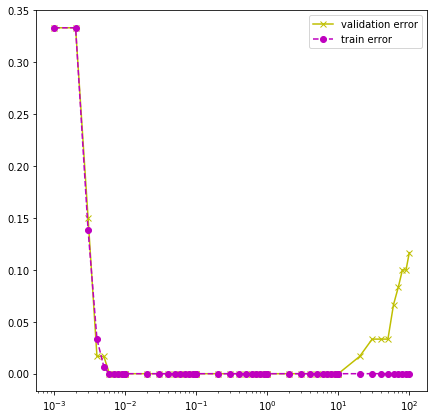

In [5]:
# Using larger training set sizes may alleviate variance issues
# Notice how the sweet region where bias and generalization error
# are both low, widens with the use of more data points

n = 50

(XPos, yPos, XNeg, yNeg) = genStackedCirclesData( d, n, r )
Xtrn = np.vstack( (XPos, XNeg) )
ytrn = np.concatenate( (yPos, yNeg) )

fig4 = pd.getFigure( 9, 7 )
pd.plot2D( XPos, fig4, color = 'g', marker = '+' )
pd.plot2D( XNeg, fig4, color = 'r', marker = 'x' )

for i in range( len(gVals) ):
    g = gVals[i]
    clf = csvm( C = 1.0, kernel = "rbf", gamma = g )
    clf.fit( Xtrn, ytrn )
    trainAcc[i] = clf.score( Xtrn, ytrn )
    valAcc[i] = clf.score( Xval, yval )

fig5 = pd.getFigure( 7, 7 )
plt.semilogx( gVals, 1 - valAcc, marker = 'x', label = "validation error", color = 'y' )
plt.semilogx( gVals, 1 - trainAcc, marker = 'o', linestyle = '--', label = "train error", color = 'm' )
plt.legend()